In [10]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
df = pd.read_csv("heart_disease_dataset.csv")
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [13]:
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [14]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes

df['Smoking']=df['Smoking'].astype('category')
df['Smoking']=df['Smoking'].cat.codes

df['Alcohol Intake']=df['Alcohol Intake'].astype('category')
df['Alcohol Intake']=df['Alcohol Intake'].cat.codes

df['Family History']=df['Family History'].astype('category')
df['Family History']=df['Family History'].cat.codes


df['Diabetes']=df['Diabetes'].astype('category')
df['Diabetes']=df['Diabetes'].cat.codes


df['Obesity']=df['Obesity'].astype('category')
df['Obesity']=df['Obesity'].cat.codes

df['Exercise Induced Angina']=df['Exercise Induced Angina'].astype('category')
df['Exercise Induced Angina']=df['Exercise Induced Angina'].cat.codes

df['Chest Pain Type']=df['Chest Pain Type'].astype('category')
df['Chest Pain Type']=df['Chest Pain Type'].cat.codes
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,0,0,1,0,0,1,8,119,1,1,1
1,48,1,204,165,62,0,-1,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,2,0,3,1,0,1,5,196,1,1,1
3,69,0,192,90,72,0,-1,4,0,1,0,7,107,1,2,0
4,62,0,172,163,93,2,-1,6,0,1,0,2,183,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,2,0,5,0,1,1,10,120,0,2,1
996,78,0,334,145,76,2,-1,6,0,0,0,10,196,1,3,1
997,79,1,151,179,81,2,1,4,1,0,1,8,189,1,0,0
998,60,0,326,151,68,1,-1,8,1,1,0,5,174,1,1,1


In [15]:
df['Alcohol Intake'] = df['Alcohol Intake'].replace(-1, np.nan)

In [16]:
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [17]:
df=df.dropna()
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,0,0.0,1,0,0,1,8,119,1,1,1
2,53,1,234,91,67,2,0.0,3,1,0,1,5,196,1,1,1
6,64,0,211,105,86,1,0.0,8,1,1,1,2,120,0,3,1
7,60,0,208,148,83,2,1.0,4,0,1,1,2,113,1,0,1
8,37,0,317,137,66,0,0.0,3,0,1,1,5,114,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,26,0,215,100,74,2,0.0,7,0,1,0,10,135,0,1,0
992,28,0,220,102,73,0,1.0,7,1,1,1,10,102,0,3,0
994,52,1,248,159,76,1,1.0,9,0,1,1,2,152,1,0,1
995,56,0,269,111,86,2,0.0,5,0,1,1,10,120,0,2,1


In [18]:
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [19]:
X=df.drop(columns='Heart Disease')
y=df["Heart Disease"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [21]:
X_train

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
300,52,1,319,123,96,2,0.0,2,0,0,1,8,117,0,2
603,56,1,274,105,79,0,1.0,3,0,0,1,5,174,0,2
413,57,0,229,179,63,2,0.0,2,0,1,0,7,144,0,1
984,26,0,298,162,67,2,1.0,3,1,1,1,10,98,0,0
930,63,0,302,134,98,2,0.0,4,1,1,1,4,167,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,43,1,155,169,82,0,0.0,8,1,1,0,2,163,0,3
542,76,1,244,139,79,1,1.0,5,1,1,0,2,71,1,2
289,67,0,244,124,60,1,1.0,3,0,1,1,3,166,0,0
950,45,0,157,115,75,0,0.0,2,1,1,0,10,175,0,0


In [22]:
y_train

300    1
603    1
413    1
984    0
930    1
      ..
13     0
542    1
289    1
950    0
854    0
Name: Heart Disease, Length: 528, dtype: int64

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

C:\Users\PRERANA ROY\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model

LogisticRegression()

In [26]:
X_test

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
823,31,0,226,163,69,2,1.0,7,1,1,0,10,110,0,0
154,39,0,200,98,77,1,1.0,0,1,1,1,6,101,0,2
19,74,0,298,148,70,1,0.0,9,1,1,1,8,157,1,2
801,43,0,342,107,86,0,0.0,3,0,0,0,4,98,1,1
448,51,1,193,121,91,2,0.0,3,1,1,1,4,73,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,51,1,318,168,92,1,1.0,3,0,0,1,9,164,1,0
152,76,0,347,116,69,0,0.0,5,1,1,0,6,149,1,0
344,49,1,326,157,63,2,0.0,3,1,1,1,10,77,0,0
790,31,1,343,144,62,0,1.0,3,1,0,1,9,165,1,2


In [27]:
y_test

823    0
154    0
19     1
801    0
448    0
      ..
484    1
152    1
344    0
790    0
287    0
Name: Heart Disease, Length: 132, dtype: int64

In [28]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [29]:
print(y_predict)
print(y_test)

[0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]
823    0
154    0
19     1
801    0
448    0
      ..
484    1
152    1
344    0
790    0
287    0
Name: Heart Disease, Length: 132, dtype: int64


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.803030303030303


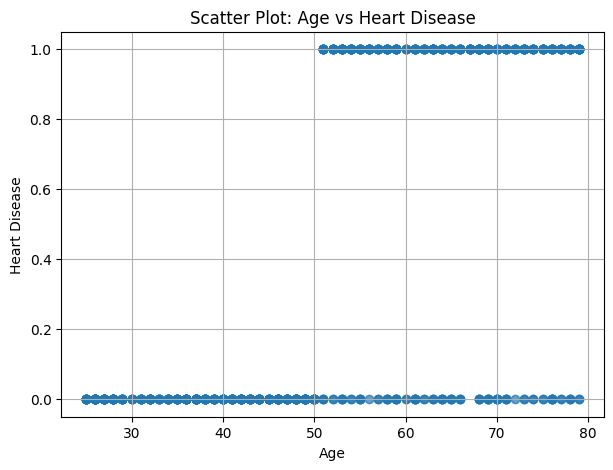

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(df["Age"], df["Heart Disease"], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Heart Disease")
plt.title("Scatter Plot: Age vs Heart Disease")
plt.grid(True)
plt.show()


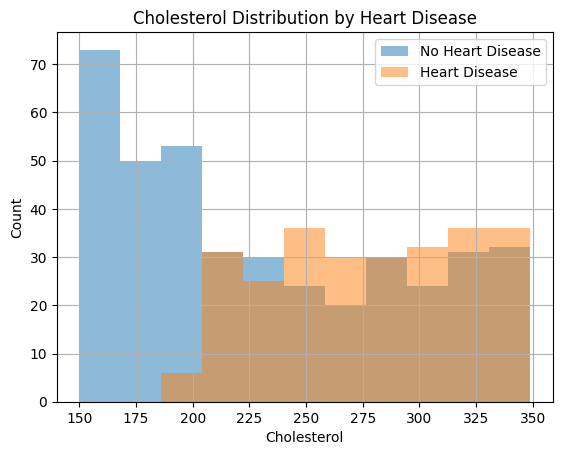

In [32]:

chol0 = df[df["Heart Disease"] == 0]["Cholesterol"]
chol1 = df[df["Heart Disease"] == 1]["Cholesterol"]

bins = np.histogram_bin_edges(df["Cholesterol"], bins="auto")

plt.hist(chol0, bins=bins, alpha=0.5, label="No Heart Disease")
plt.hist(chol1, bins=bins, alpha=0.5, label="Heart Disease")

plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("Cholesterol Distribution by Heart Disease")
plt.legend()
plt.grid(True)
plt.show()


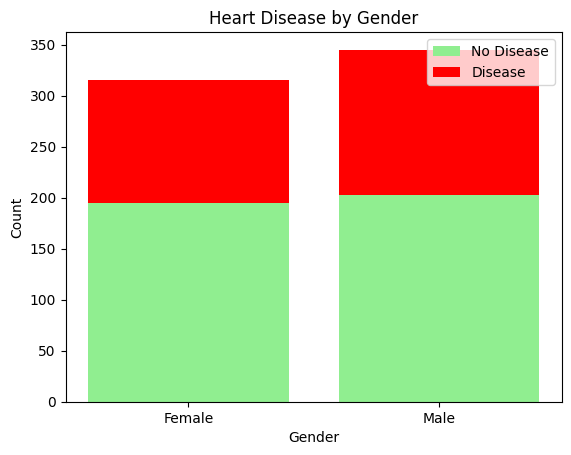

In [33]:
male_disease = len(df[(df['Gender']==1) & (df['Heart Disease']==1)])
male_no = len(df[(df['Gender']==1) & (df['Heart Disease']==0)])
female_disease = len(df[(df['Gender']==0) & (df['Heart Disease']==1)])
female_no = len(df[(df['Gender']==0) & (df['Heart Disease']==0)])

labels = ['Female', 'Male']
no_disease = [female_no, male_no]
disease = [female_disease, male_disease]

plt.bar(labels, no_disease, color='lightgreen', label='No Disease')
plt.bar(labels, disease, bottom=no_disease, color='red', label='Disease')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Heart Disease by Gender')
plt.legend()
plt.show()

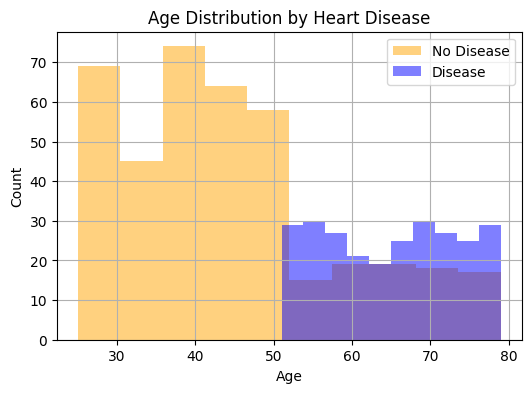

In [34]:
plt.figure(figsize=(6,4))
df[df["Heart Disease"]==0]["Age"].plot(kind="hist", alpha=0.5, label="No Disease",color='orange')
df[df["Heart Disease"]==1]["Age"].plot(kind="hist", alpha=0.5, label="Disease",color='blue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Heart Disease")
plt.legend()
plt.grid(True)
plt.show()


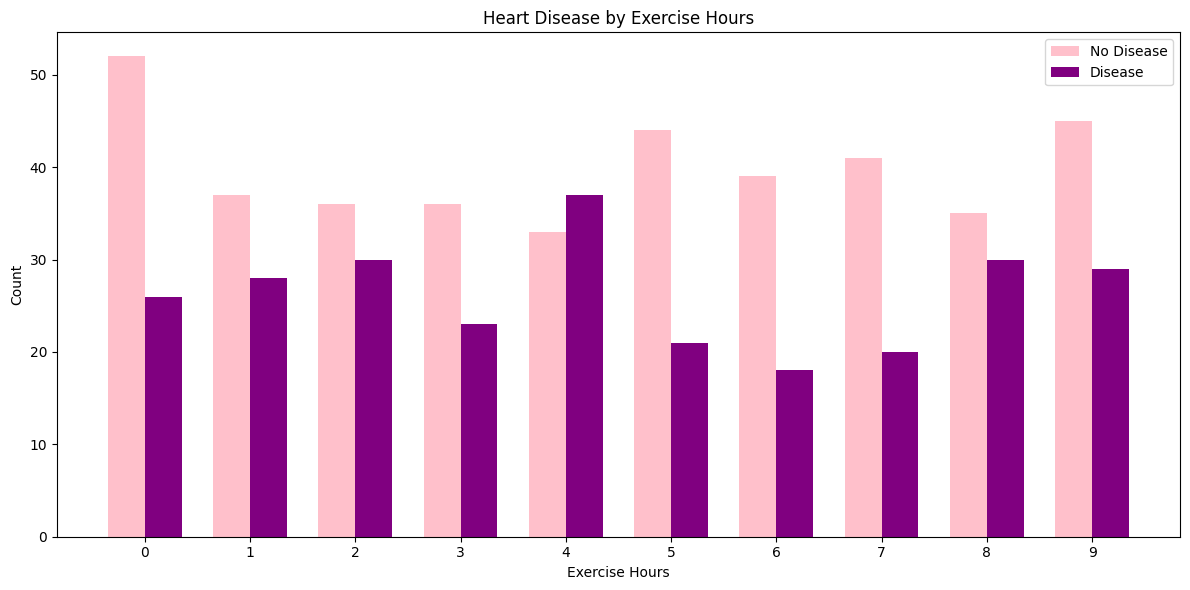

In [35]:


labels = sorted(df['Exercise Hours'].unique())
x = np.arange(len(labels))
width = 0.35

no_disease = [len(df[(df['Exercise Hours'] == val) & (df['Heart Disease'] == 0)]) for val in labels]
disease = [len(df[(df['Exercise Hours'] == val) & (df['Heart Disease'] == 1)]) for val in labels]

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, no_disease, width, label='No Disease', color='pink')
plt.bar(x + width/2, disease, width, label='Disease', color='purple')

plt.xticks(x, labels)
plt.xlabel('Exercise Hours')
plt.ylabel('Count')
plt.title('Heart Disease by Exercise Hours')
plt.legend()
plt.tight_layout()
plt.show()

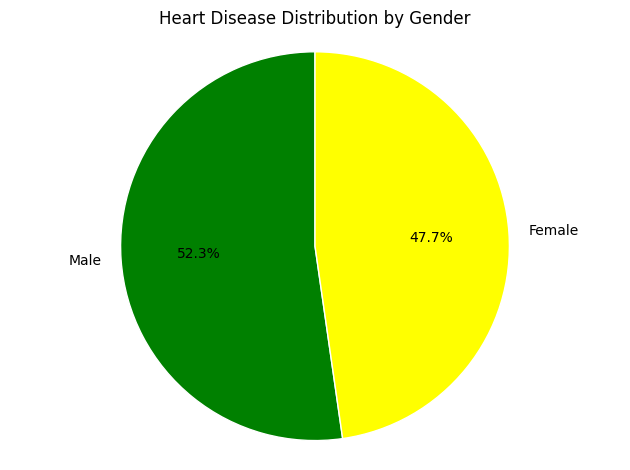

In [36]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts,labels=['Male','Female'],autopct='%1.1f%%',startangle=90,colors=['green','yellow'], wedgeprops={'edgecolor': 'white'}
)
plt.title('Heart Disease Distribution by Gender')
plt.axis('equal')
plt.tight_layout()
plt.show()
